<a href="https://colab.research.google.com/github/Giffy/AI_Intro-to-Machine-Learning/blob/master/Session-5/K_means_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.youtube.com/watch?v=ikt0sny_ImY

# K-means algorithm


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

# Dataset preparation

Loading and analyzing the iris flowers dataset.

In [54]:
iris = datasets.load_iris()
X = scale(iris.data)
y= pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building and running your model

In [18]:
clustering = KMeans(n_clusters=3, random_state= 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

## Plotting your outputs

In [0]:
iris_df= pd.DataFrame(iris.data)
iris_df.columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y.columns = ['Targets']

<function matplotlib.pyplot.show>

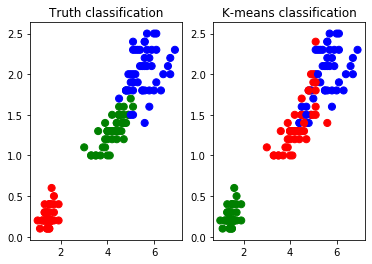

In [53]:
color_theme = np.array(['r','g','b'])
plt.subplot(1,2,1)

plt.scatter(x=iris_df['petal length (cm)'], y=iris_df['petal width (cm)'], c= color_theme[iris.target], s=50)
plt.title('Truth classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df['petal length (cm)'], y=iris_df['petal width (cm)'], c= color_theme[clustering.labels_], s=50)
plt.title('K-means classification')

plt.show

<function matplotlib.pyplot.show>

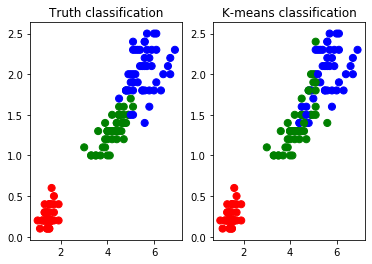

In [62]:
relabel = np.choose(clustering.labels_,[1,0,2]).astype(np.int64)
color_theme = np.array(['r','g','b'])
plt.subplot(1,2,1)

plt.scatter(x=iris_df['petal length (cm)'], y=iris_df['petal width (cm)'], c= color_theme[iris.target], s=50)
plt.title('Truth classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df['petal length (cm)'], y=iris_df['petal width (cm)'], c= color_theme[relabel], s=50)
plt.title('K-means classification')

plt.show

# Evaluate your clustering results

Precission is a measure of the model's relevancy

Recall is a measure of the model's completness

In [63]:
print (classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

